#02. Neural Network classification with PyTorch


Classification is a problem of predicting whether something is one thing or another (there can be multiple things as the options)

In [5]:
import sklearn
import torch
import matplotlib.pyplot as plt
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [4]:
from sklearn.datasets import make_circles

#Make 1000 samples
n_samples = 1000

#Create circles
X,y = make_circles(n_samples, noise=0.03, random_state=42)

In [7]:
X[:5], y[:5]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343]]),
 array([1, 1, 1, 1, 0], dtype=int64))

In [11]:
import pandas as pd
circles = pd.DataFrame({"X1" : X[:,0],
                        "X2" : X[:,1],
                        "label" : y})
circles.head(10)


,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


In [4]:
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0], y=X[:,1], c=y, cmap=plt.cm.RdYlBu)


NameError: name 'X' is not defined

In [15]:
X.shape, y.shape

((1000, 2), (1000,))

In [16]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [18]:
X_sample=X[0]
y_sample = y[0]
X_sample, y_sample


(array([0.75424625, 0.23148074]), 1)

In [32]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)
X.dtype, y.type, type(X)

TypeError: expected np.ndarray (got Tensor)

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
len(X_train), len(X_test)

(800, 200)

In [44]:
from torch import nn
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(in_features=2, out_features=5)
        self.layer2 = nn.Linear(in_features=5, out_features=1)
    def forward(self, x: torch.Tensor):
        return self.layer2(self.layer1(x))
        

In [96]:
model = CircleModelV0().to(device)
model

CircleModelV0(
  (layer1): Linear(in_features=2, out_features=5, bias=True)
  (layer2): Linear(in_features=5, out_features=1, bias=True)
)

In [97]:
model = torch.nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1),
).to(device)

model.state_dict()


OrderedDict([('0.weight',
              tensor([[-0.0829, -0.2872],
                      [ 0.4691, -0.5582],
                      [-0.3260, -0.1997],
                      [-0.4252,  0.0667],
                      [-0.6984,  0.6386]], device='cuda:0')),
             ('0.bias',
              tensor([-0.6007,  0.5459,  0.1177, -0.2296,  0.4370], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.0697,  0.3613,  0.0489, -0.1410,  0.1202]], device='cuda:0')),
             ('1.bias', tensor([-0.1213], device='cuda:0'))])

In [62]:
with torch.inference_mode():
    untrained_preds = model(X_test.to(device))
    print(f"Length of predictions:{len(untrained_preds)}, Shape:{untrained_preds.shape}")
    print(f"Length of test samples:{len(X_test)}, Shape: {X_test.shape}")
    print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")
    print(f"\nFirst 10 labels:\n{y_test[:10]}")

Length of predictions:200, Shape:torch.Size([200, 1])
Length of test samples:200, Shape: torch.Size([200, 2])

First 10 predictions:
tensor([[ 0.1437],
        [ 0.1029],
        [ 0.1724],
        [ 0.1358],
        [ 0.0485],
        [ 0.0246],
        [ 0.0081],
        [-0.0106],
        [ 0.1776],
        [ 0.0988]], device='cuda:0')

First 10 labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [60]:
X_test[:10], y_test[:10]

(tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438],
         [ 0.6323, -0.5711],
         [ 0.8561,  0.5499],
         [ 1.0034,  0.1903],
         [-0.7489, -0.2951],
         [ 0.0538,  0.9739]]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

In [98]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.1)


In [23]:
#Calculate accuracy - out of 100 examples, what percentage does our model get right
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct/len(y_pred)) * 100
    return acc
    


In [72]:
model.eval()
with torch.inference_mode():
    y_logits = model(X_test.to(device))[:10]
y_logits

tensor([[ 0.1437],
        [ 0.1029],
        [ 0.1724],
        [ 0.1358],
        [ 0.0485],
        [ 0.0246],
        [ 0.0081],
        [-0.0106],
        [ 0.1776],
        [ 0.0988]], device='cuda:0')

In [82]:
y_pred_probs = torch.sigmoid(y_logits)
y_preds = torch.round(y_pred_probs)
y_pred_labels = torch.round(torch.sigmoid(model(X_test.to(device))[:10]))
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))
y_preds.squeeze()

tensor([True, True, True, True, True, True, True, True, True, True],
       device='cuda:0')


tensor([1., 1., 1., 1., 1., 1., 1., 0., 1., 1.], device='cuda:0')

In [107]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)
model = model.to(device)

for epoch in range(epochs):
    model.train()
    
    y_logits = model(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))
    
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train, y_pred=y_pred)
    
    optimizer.zero_grad()
    
    loss.backward()
    
    optimizer.step()
    
    model.eval()
    with torch.inference_mode():
        test_logits = model(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)
    
    if epoch % 10 == 0:
        print(f"Epoch:{epoch} | loss: {loss:.5f} |acc: {acc:.2f}% | test loss: {test_loss:.5f} | test acc: {test_acc:.2f}%")

Epoch:0 | loss: 0.69331 |acc: 49.25% | test loss: 0.69271 | test acc: 53.00%
Epoch:10 | loss: 0.69327 |acc: 49.75% | test loss: 0.69279 | test acc: 54.00%
Epoch:20 | loss: 0.69324 |acc: 50.25% | test loss: 0.69286 | test acc: 53.00%
Epoch:30 | loss: 0.69321 |acc: 49.75% | test loss: 0.69294 | test acc: 55.00%
Epoch:40 | loss: 0.69319 |acc: 50.62% | test loss: 0.69301 | test acc: 54.00%
Epoch:50 | loss: 0.69317 |acc: 52.25% | test loss: 0.69307 | test acc: 51.00%
Epoch:60 | loss: 0.69315 |acc: 51.38% | test loss: 0.69314 | test acc: 56.00%
Epoch:70 | loss: 0.69314 |acc: 51.12% | test loss: 0.69320 | test acc: 52.00%
Epoch:80 | loss: 0.69313 |acc: 51.25% | test loss: 0.69325 | test acc: 48.50%
Epoch:90 | loss: 0.69311 |acc: 51.00% | test loss: 0.69331 | test acc: 50.00%
Epoch:100 | loss: 0.69310 |acc: 50.88% | test loss: 0.69336 | test acc: 49.00%
Epoch:110 | loss: 0.69309 |acc: 50.62% | test loss: 0.69341 | test acc: 47.50%
Epoch:120 | loss: 0.69309 |acc: 51.12% | test loss: 0.69345 | t

In [27]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo
if Path("helper_functions.py").is_file():
    print("helper_functions.py already exists, skipping download")
else:
    request = requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py')
    with open('helper_functions.py', 'wb') as f:
        f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


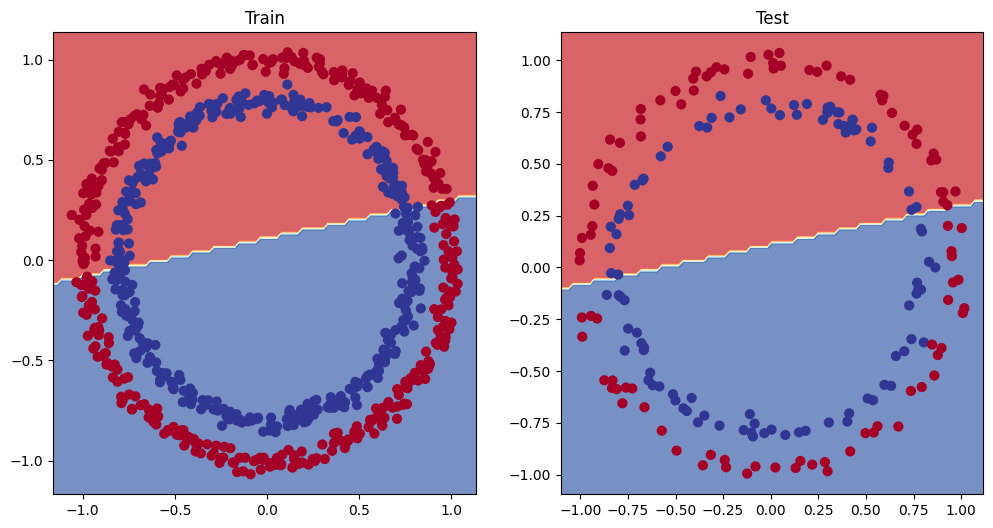

In [104]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model, X_train, y_train)
plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model, X_test, y_test)

In [108]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
    def forward(self, x):
#         z = self.layer_1(x)
#         z = self.layer_2(z)
#         z = self.layer_3(z)
        return self.layer_3(self.layer_2(self.layer_1(x)))
        
        

In [110]:
model_1 = CircleModelV1().to(device)
model_1.state_dict()


OrderedDict([('layer_1.weight',
              tensor([[-0.3041, -0.0775],
                      [-0.5293,  0.6441],
                      [-0.5190,  0.3779],
                      [ 0.2485,  0.2298],
                      [-0.3823,  0.6427],
                      [ 0.1554,  0.0910],
                      [-0.6231,  0.2968],
                      [-0.1061, -0.3239],
                      [ 0.6074,  0.1576],
                      [-0.3912, -0.3579]], device='cuda:0')),
             ('layer_1.bias',
              tensor([-0.0338,  0.3948, -0.1807, -0.4035, -0.2421, -0.5283,  0.2522,  0.5473,
                      -0.6657,  0.1642], device='cuda:0')),
             ('layer_2.weight',
              tensor([[ 0.1634,  0.0573, -0.1126,  0.1651,  0.1662,  0.1182, -0.0556, -0.0837,
                        0.0338, -0.0559],
                      [-0.0942,  0.2021,  0.2718, -0.0313, -0.0708,  0.0046, -0.0189,  0.0760,
                        0.0886, -0.2872],
                      [-0.1167,  0.266

In [113]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1)

In [115]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    model_1.train()
    y_logits = model_1(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))
    
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train, y_pred=y_pred)
    
    optimizer.zero_grad()
    
    loss.backward()
    
    optimizer.step()
    
    model_1.eval()
    with torch.inference_mode():
        test_logits = model_1(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)
        
    if epoch % 100 == 0:
        print(f"Epoch:{epoch} | Loss: {loss:.5f} | Acc: {acc:.2f}% | Test Loss: {test_loss:.5f} | Test Acc: {test_acc:.2f}%")

Epoch:0 | Loss: 0.69528 | Acc: 51.38% | Test Loss: 0.69252 | Test Acc: 50.50%
Epoch:100 | Loss: 0.69325 | Acc: 47.88% | Test Loss: 0.69283 | Test Acc: 51.00%
Epoch:200 | Loss: 0.69309 | Acc: 49.88% | Test Loss: 0.69344 | Test Acc: 46.50%
Epoch:300 | Loss: 0.69303 | Acc: 50.50% | Test Loss: 0.69384 | Test Acc: 47.50%
Epoch:400 | Loss: 0.69300 | Acc: 51.38% | Test Loss: 0.69412 | Test Acc: 46.50%
Epoch:500 | Loss: 0.69299 | Acc: 51.12% | Test Loss: 0.69431 | Test Acc: 46.00%
Epoch:600 | Loss: 0.69298 | Acc: 51.50% | Test Loss: 0.69444 | Test Acc: 46.00%
Epoch:700 | Loss: 0.69298 | Acc: 51.38% | Test Loss: 0.69452 | Test Acc: 45.50%
Epoch:800 | Loss: 0.69298 | Acc: 51.50% | Test Loss: 0.69458 | Test Acc: 44.50%
Epoch:900 | Loss: 0.69298 | Acc: 51.38% | Test Loss: 0.69461 | Test Acc: 45.00%


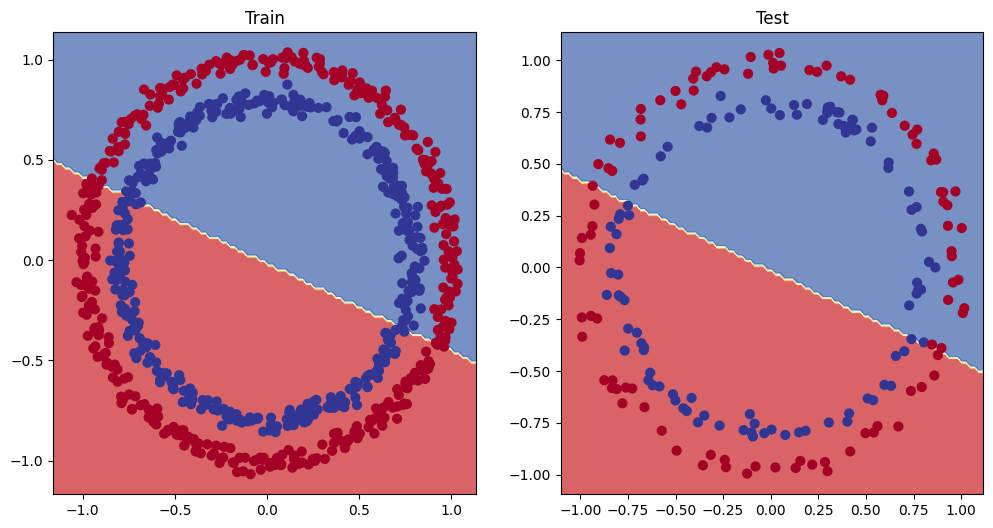

In [117]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model_1, X_test, y_test)

In [137]:
X_regression = torch.arange(0, 1, 0.01).unsqueeze(dim=1)
y_regression = 0.7* X_regression + 0.3 

print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

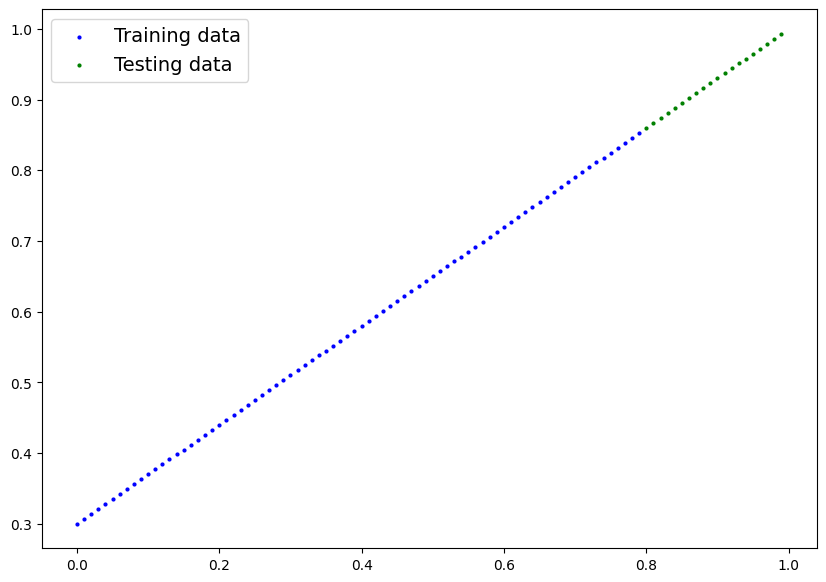

In [138]:
train_split = int(0.8*len(X_regression))
X_train_regression, y_train_regression, X_test_regression, y_test_regression = X_regression[:train_split], y_regression[:train_split], X_regression[train_split:], y_regression[train_split:]
len(X_train_regression), len(y_train_regression), len(X_test_regression), len(y_test_regression)

plot_predictions(train_data=X_train_regression, train_labels=y_train_regression, test_data=X_test_regression, test_labels=y_test_regression)

In [143]:
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [147]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.01)


In [148]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000
X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

for epoch in range(epochs):
    y_pred = model_2(X_train_regression)
    loss = loss_fn(y_pred, y_train_regression)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    model_2.eval()
    with torch.inference_mode():
        test_pred = model_2(X_test_regression)
        test_loss = loss_fn(test_pred, y_test_regression)
        
    if epoch % 100 == 0:
        print(f'Epoch: {epoch} | loss: {loss:.5f} | test loss:{test_loss:.5f}')
        
    

Epoch: 0 | loss: 0.06790 | test loss:0.00593
Epoch: 100 | loss: 0.00329 | test loss:0.01034
Epoch: 200 | loss: 0.00401 | test loss:0.00826
Epoch: 300 | loss: 0.00466 | test loss:0.00620
Epoch: 400 | loss: 0.00527 | test loss:0.00457
Epoch: 500 | loss: 0.00584 | test loss:0.00309
Epoch: 600 | loss: 0.00624 | test loss:0.00180
Epoch: 700 | loss: 0.00640 | test loss:0.00139
Epoch: 800 | loss: 0.00624 | test loss:0.00182
Epoch: 900 | loss: 0.00636 | test loss:0.00133


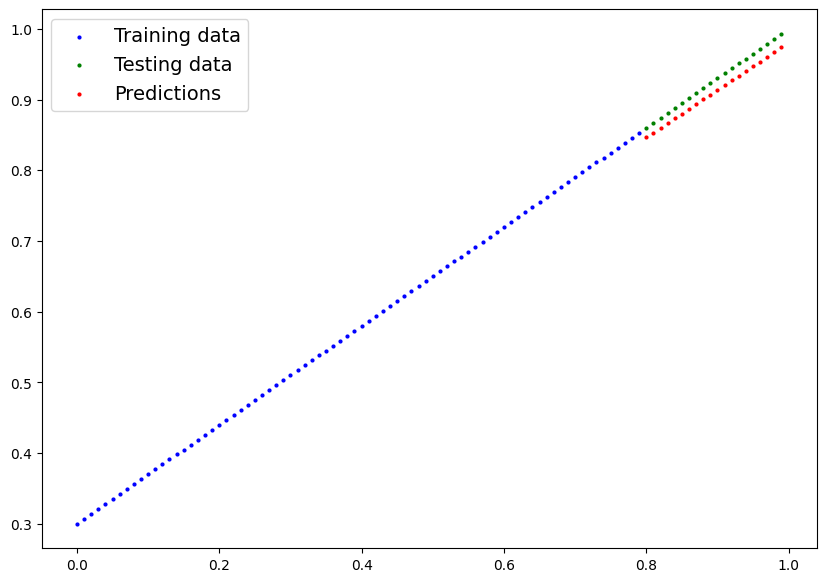

In [151]:
model_2.eval()

with torch.inference_mode():
    y_preds = model_2(X_test_regression)
    
plot_predictions(train_data=X_train_regression.cpu(), train_labels=y_train_regression.cpu(), test_data= X_test_regression.cpu(), test_labels=y_test_regression.cpu(), predictions=y_preds.cpu())

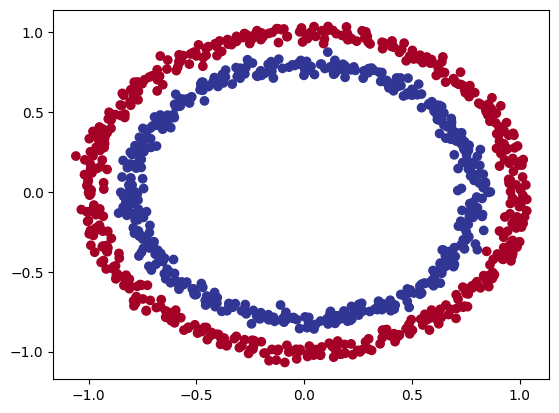

In [158]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X,y = make_circles(n_samples, noise=0.03, random_state=42)
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu )

In [162]:
import torch
from sklearn.model_selection import train_test_split

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)




TypeError: expected np.ndarray (got Tensor)

In [164]:

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
len(X_train), len(X_test)

(800, 200)

In [167]:
from torch import nn
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

In [169]:
model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [171]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_3.parameters(), lr=0.1)

In [193]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
model_3.to(device)
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

epochs = 1000

for epoch in range(epochs):
    model_3.train()
    y_logits = model_3(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train, y_pred=y_pred)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    model_3.eval()
    with torch.inference_mode():
        test_logits = model_3(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)
    
    if epoch % 100 == 0:
        print(f"Epoch:{epoch} | Loss: {loss:.4f} | Acc: {acc:.2f}% | Test Loss: {test_loss:.4f} | Test Acc: {test_acc:.2f}%")
    
    

Epoch:0 | Loss: 0.5675 | Acc: 88.00% | Test Loss: 0.5732 | Test Acc: 86.50%
Epoch:100 | Loss: 0.4805 | Acc: 93.50% | Test Loss: 0.4985 | Test Acc: 90.50%
Epoch:200 | Loss: 0.3694 | Acc: 97.88% | Test Loss: 0.4049 | Test Acc: 92.50%
Epoch:300 | Loss: 0.2536 | Acc: 99.00% | Test Loss: 0.3023 | Test Acc: 96.50%
Epoch:400 | Loss: 0.1712 | Acc: 99.50% | Test Loss: 0.2204 | Test Acc: 97.50%
Epoch:500 | Loss: 0.1215 | Acc: 99.75% | Test Loss: 0.1647 | Test Acc: 99.00%
Epoch:600 | Loss: 0.0910 | Acc: 99.88% | Test Loss: 0.1271 | Test Acc: 99.50%
Epoch:700 | Loss: 0.0708 | Acc: 99.88% | Test Loss: 0.1030 | Test Acc: 99.50%
Epoch:800 | Loss: 0.0576 | Acc: 99.88% | Test Loss: 0.0866 | Test Acc: 99.50%
Epoch:900 | Loss: 0.0484 | Acc: 99.88% | Test Loss: 0.0746 | Test Acc: 99.50%


In [174]:
model_3.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]], device='cuda:0')),
             ('layer_1.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984], device='cuda:0')),
             ('layer_2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.122

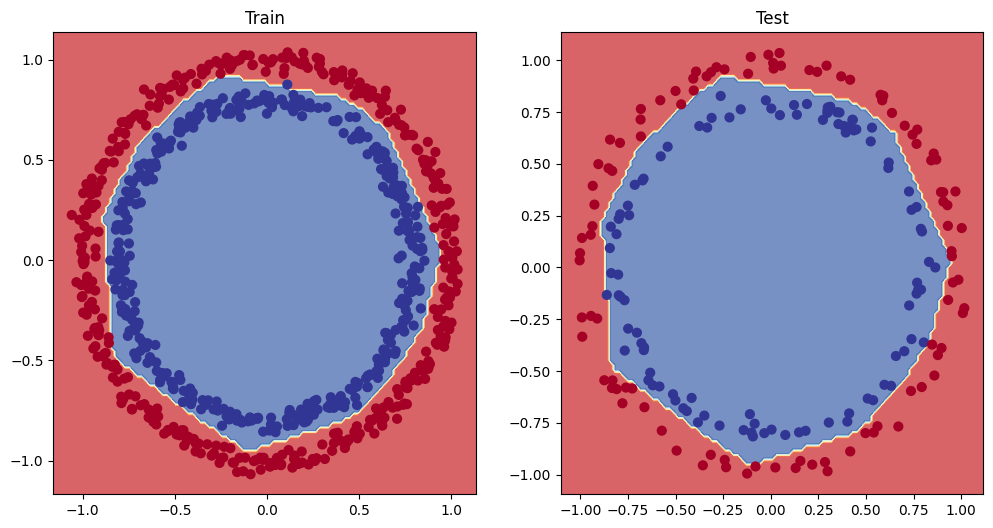

In [195]:
model_3.to(device)
model_3.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()

y_preds[:10], y_test[:10]

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)


In [189]:
next(model_3.parameters()).device

device(type='cpu')

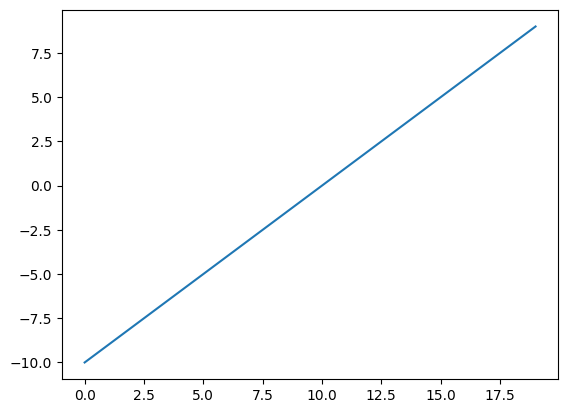

In [198]:
A = torch.arange(-10,10,1,dtype=torch.float32)
plt.plot(A)

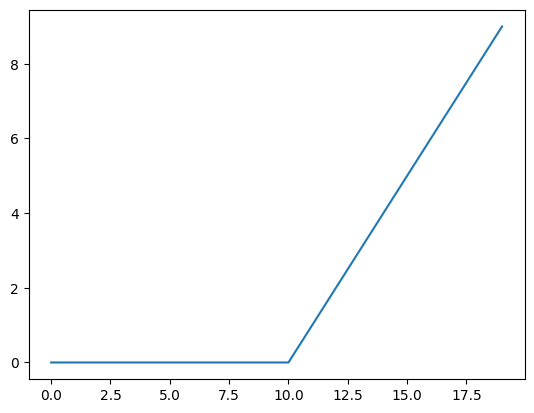

In [199]:
plt.plot(torch.relu(A))

In [200]:
def relu(x: torch.Tensor) -> torch.Tensor:
    return torch.maximum(torch.tensor(0), x)


relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

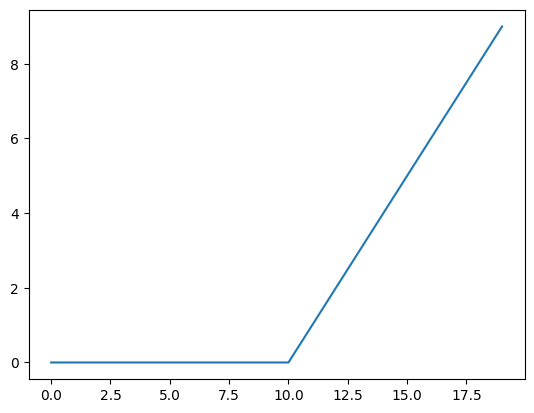

In [201]:
plt.plot(relu(A))

In [202]:
def sigmoid(x):
    return 1/(1 + torch.exp(-x))

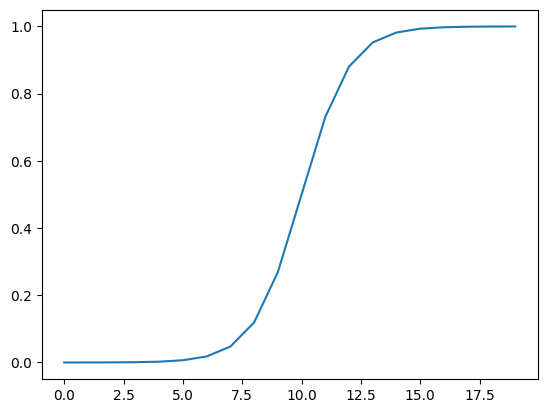

In [203]:
plt.plot(sigmoid(A))

In [12]:
import torch
from torch import nn
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

X_blob, y_blob = make_blobs(n_samples=1000, n_features=NUM_FEATURES, centers=NUM_CLASSES, cluster_std=1.5, random_state=RANDOM_SEED)

X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob, y_blob, test_size=0.2, random_state=RANDOM_SEED)


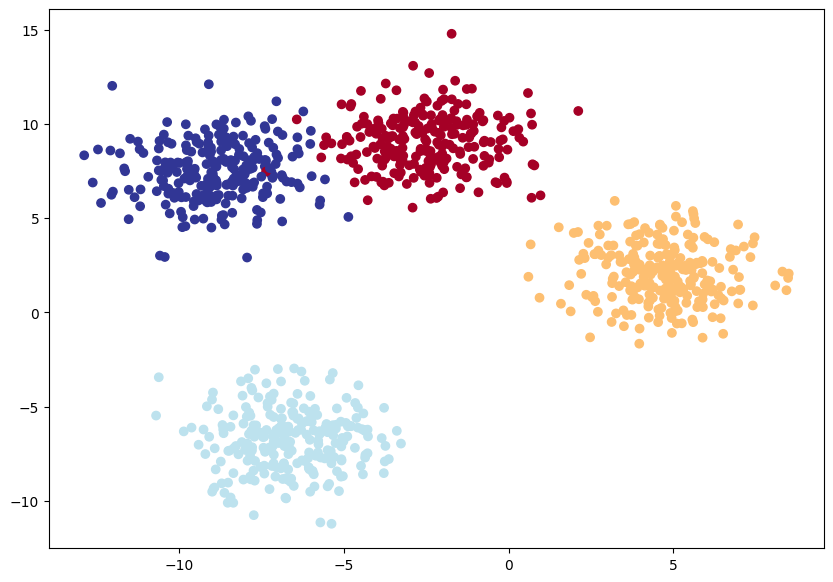

In [14]:
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:,0], X_blob[:,1], c=y_blob, cmap=plt.cm.RdYlBu)


In [15]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

X_blob_train.shape, y_blob_train.shape, torch.unique(y_blob_train)

(torch.Size([800, 2]), torch.Size([800]), tensor([0, 1, 2, 3]))

In [16]:
class BlobModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=8):
        """Initializes multi-classification model
        Args:
            input_features(int) : Number of input features to the model
            output_features(int) : Number of output features (number of output classes)
            hidden_units (int) : Number of hidden units between layers, default 8
        
        Returns:
        
        Examples:
        """
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_features)
        )
        
    def forward(self, x):
        return self.linear_layer_stack(x)
        

In [17]:
model_4 = BlobModel(input_features=2, output_features=4, hidden_units=8).to(device)
model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [18]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_4.parameters(), lr=0.1)

In [19]:
X_blob_test = X_blob_test.to(device)
model_4.eval()
with torch.inference_mode():
    y_logits = model_4(X_blob_test)


In [20]:
y_pred_probs = torch.softmax(y_logits, dim=1)
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds, y_blob_test

(tensor([3, 0, 2, 3, 0, 0, 2, 0, 2, 0, 0, 3, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 3, 3,
         3, 2, 0, 0, 3, 0, 0, 3, 3, 0, 3, 2, 3, 0, 0, 3, 0, 0, 0, 2, 0, 0, 3, 0,
         0, 0, 3, 0, 3, 3, 0, 2, 3, 3, 0, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 2, 0, 0, 0, 0, 3, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 3, 0, 0, 0,
         3, 0, 0, 2, 0, 0, 0, 0, 2, 0, 3, 0, 0, 2, 3, 3, 0, 2, 2, 0, 0, 0, 3, 2,
         2, 0, 0, 3, 2, 0, 0, 0, 2, 0, 3, 3, 0, 3, 0, 0, 0, 0, 3, 3, 3, 0, 2, 2,
         2, 2, 0, 0, 0, 2, 2, 3, 0, 2, 0, 0, 0, 0, 2, 3, 2, 0, 0, 2, 0, 0, 2, 0,
         3, 2, 3, 0, 0, 3, 3, 3, 3, 3, 0, 3, 0, 2, 2, 3, 2, 2, 0, 3, 2, 2, 0, 0,
         3, 0, 2, 0, 0, 3, 2, 3], device='cuda:0'),
 tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
         2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
         0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
         3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 

In [21]:
model_4.to(device)
X_blob_train, X_blob_test = X_blob_train.to(device), X_blob_test.to(device)
y_blob_train, y_blob_test = y_blob_train.to(device), y_blob_test.to(device)

In [24]:
epochs = 100


for epoch in range(epochs):
    model_4.train()
    y_logits = model_4(X_blob_train)
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)
    loss = loss_fn(y_logits, y_blob_train)
    acc = accuracy_fn(y_true=y_blob_train, y_pred=y_pred)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    model_4.eval()
    with torch.inference_mode():
        test_logits = model_4(X_blob_test)
        test_preds = torch.softmax(test_logits,dim=1).argmax(dim=1)
        test_loss = loss_fn(test_logits, y_blob_test)
        test_acc = accuracy_fn(y_true=y_blob_test, y_pred=test_preds)
        
    if epoch % 10 == 0:
        print(f"Epoch:{epoch} | Loss: {loss:.4f} | Acc: {acc:.2f}% | Test Loss: {test_loss:.4f} | Test Acc: {test_acc:.2f}%")
        

Epoch:0 | Loss: 1.2963 | Acc: 46.75% | Test Loss: 1.0054 | Test Acc: 54.00%
Epoch:10 | Loss: 0.5544 | Acc: 93.75% | Test Loss: 0.4763 | Test Acc: 94.00%
Epoch:20 | Loss: 0.2642 | Acc: 98.12% | Test Loss: 0.2104 | Test Acc: 99.50%
Epoch:30 | Loss: 0.1207 | Acc: 99.00% | Test Loss: 0.1009 | Test Acc: 99.50%
Epoch:40 | Loss: 0.0776 | Acc: 99.00% | Test Loss: 0.0646 | Test Acc: 99.50%
Epoch:50 | Loss: 0.0598 | Acc: 99.00% | Test Loss: 0.0487 | Test Acc: 99.50%
Epoch:60 | Loss: 0.0505 | Acc: 99.12% | Test Loss: 0.0401 | Test Acc: 99.50%
Epoch:70 | Loss: 0.0448 | Acc: 99.12% | Test Loss: 0.0347 | Test Acc: 99.50%
Epoch:80 | Loss: 0.0411 | Acc: 99.12% | Test Loss: 0.0311 | Test Acc: 99.50%
Epoch:90 | Loss: 0.0384 | Acc: 99.12% | Test Loss: 0.0285 | Test Acc: 99.50%


In [41]:
model_4.to(device)
model_4.eval()
with torch.inference_mode():
    y_logits = model_4(X_blob_test)
    y_preds = y_logits.argmax(dim=1)
    
y_preds


tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 0, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1], device='cuda:0')

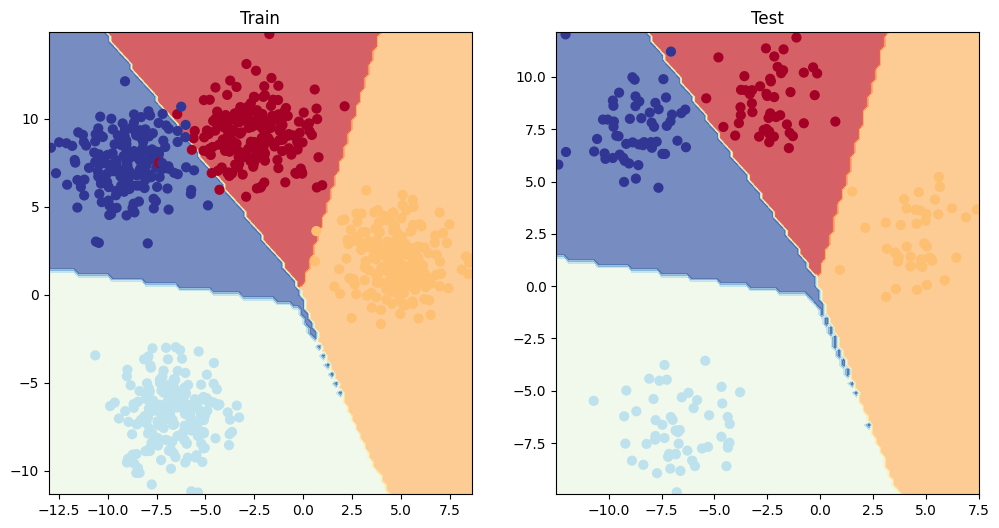

In [28]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

In [43]:
from torchmetrics import Accuracy
torchmetric_accuracy = Accuracy(task='multiclass', num_classes=4).to(device)

torchmetric_accuracy(y_preds, y_blob_test)


tensor(0.9950, device='cuda:0')

In [42]:
y_preds, y_blob_test

(tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
         2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
         0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
         3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
         1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
         2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
         2, 2, 0, 3, 0, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
         2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
         1, 3, 2, 0, 3, 1, 2, 1], device='cuda:0'),
 tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
         2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
         0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
         3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 